<a href="https://colab.research.google.com/github/KevinCantrell/carbon_dioxide/blob/master/CO2_CaCO3_Equilibrium_Publication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring the Connection Between Atmospheric Carbon Dioxide and Ocean Acidification through an AI-Assisted Coding Exercise
### W. Paige Hall and Steven G. Mayer
In this coding activity you will explore the connection between atmospheric carbon dioxide and ocean acidity. The python script you create will allow you to determine the equilibrium concentrations of each chemical species in a system comprising carbon dioxide and water. Using the equilibrium concentration of $H^+$, you will calculate aqueous pH and create a plot that demonstrates its dependence on the atmospheric partial pressure of carbon dioxide.

# Part I: The Chemistry
Atmospheric $CO_2$ and dissolved $CO_2$ can exist in thermodynamic equilibrium ([Zeebe, 2012](https://www.annualreviews.org/doi/abs/10.1146/annurev-earth-042711-105521)):

  $𝐶𝑂_{2 \, (g)} \rightleftharpoons 𝐶𝑂_{2 \, (aq)}$ (Eq. 1)

At equilibrium, the amount of dissolved $CO_2$ can be determined using Henry’s Law constant ($K_H$):

  $𝐶𝑂_{2 \, (aq)} = K_HP_{CO_2}$ (Eq. 2)

Where $P_{CO_2}$ is the partial pressure of $CO_2$ in the atmosphere.

At a typical pH of 8.2 of surface seawater, the dominant form of carbon exists as bicarbonate ion due to the dissociation of carbonic acid in water ([Dickson, 2010](https://www.pmel.noaa.gov/co2/files/dickson_thecarbondioxidesysteminseawater_equilibriumchemistryandmeasurementspp17-40.pdf)):

  $𝐶𝑂_{2 \, (aq)} + H_2O \rightleftharpoons H_2𝐶𝑂_{3 \, (aq)}$ (Eq. 3)

  $H_2𝐶𝑂_{3 \, (aq)} \rightleftharpoons H^+_{ \, (aq)} + HCO_{3 \, (aq)}^-$ (Eq. 4)

  $HCO_{3 \, (aq)}^- \rightleftharpoons H^+_{ \, (aq)} + CO_{3 \, (aq)}^{2-}$ (Eq. 5)

Where the $K_{eq}$ for carbonic acid formation is $1.70 \times{} 10^{-3}$, $pK_{a1} = 6.351$, and $pK_{a2} = 10.329$ at 25°C ([Goldberg et al., 2002](https://www.nist.gov/system/files/documents/srd/jpcrd615.pdf)).

Due to these processes, the amount of dissolved $CO_2$ strongly influences the acidity of the oceans.

We can solve the simultaneous equations associated with this equilibrium system using the [fsolve function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) from the scipy library in Python.

# Part II: Defining the System of Equations
The first step in defining our system of equations is to identify all the reactions pertinent to the aqueous system. In addition to equations 3 - 5 outlined above, we must also consider the dissociation of water. In the markdown cell below, type out the equilibrium expression for each of these four chemical processes. Use the [Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb) to ensure that your expressions are properly formatted.

###Aqueous Equilibrium Expressions

###Charge Balance
In addition to our equilibrium expressions we must also have an equation that describes the charge balance in the system. The charge balance formula is

$n_1[C_1] + n_2[C_2] +  ... = m_1[A_1] + m_2[A_2] +  ...$

Where, e.g., $[C_1]$ is the concentration of cation 1 and $n_1$ is the charge on cation 1, and $[A_1]$ is the concentration of anion 1 and $m_1$ is the charge on anion 1. This equation ensures that the overall charge in the system is neutral. Write the charge balance equation for your aqueous system in the markdown cell below.

###Charge Balance Equation

###Mass Balance
Another necessary equation is the mass balance equation. This equation ensures that the total amount of all forms of a given species in solution is equal to the amount of that species originally introduced to the solution. For example, consider the dissociation of phosphoric acid, $H_3PO_4$, which dissociates to $H_2PO_4^-$, $HPO_4^{2-}$, and $PO_4^{3-}$. If we call the initial concentration of phosphoric acid $[H_3PO_4]_{initial}$, then the mass balance equation can be written as

$[H_3PO_4]_{initial}=[H_3PO_4]+[H_2PO_4^{-}]+[HPO_4^{2-}]+[PO_4^{3-}]$

Where the right hand side of the equation represents the equilibrium concentration of each phosphate species. In the markdown cell below, write the mass balance equation for aqueous carbon dioxide.

###Mass Balance Equation

#Part III: Defining the Variables
To find the solutions to a set of equations, it is necessary for the number of equations to match the number of variables. In the mardown cell below, identify and list all of the chemical variables from the set of equations you defined above. Does your number of variables match your number of equations?

###Chemical Variables

#Part IV: Creating a Coefficient Matrix
To solve our system of equations we will use a method known as *Cramer's Rule*. In this method, the coefficients of each variable are formatted as an $n^{th}$ order square matrix, where $n$ is our number of equations and variables. For example, consider a system comprising three equations and three variables such as

$x + y + z =  2$

$3x + y - 2z = -5$

$2x - y - 3z = -5$

The coefficients for $x$, $y$, and $z$ can be formatted as a $3^{rd}$ order (i.e. 3 row x 3 column) square matrix.

\\

$
  \begin{bmatrix}
  1 & 1 & 1 \\
  3 & 1 & -2 \\
  2 & -1 & -3
  \end{bmatrix} \times
  \begin{bmatrix} x \\ y \\ z \end{bmatrix}=
  \begin{bmatrix} 2 \\ -5 \\ -5 \end{bmatrix}
$

\\
We can similarly format the coefficients for our six CO$_2$ equations as a $6^{th}$ order matrix. However, to use Cramer's rule to solve a system of this size by hand is cumbersome. Instead we will take advantage of the [fsolve function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) from the SciPy library in Python. The fsolve function requires as inputs a set of equations defined as f(x)=0 and an initial guess for x.

This [fsolve video tutorial](https://youtu.be/q2wFx5aj3Lg?si=qgXpanjxjFdeGvd3) walks through example fsolve problems step-by-step. Before tackling the carbon dioxide/carbonate system, work through the tutorial and write a Python script that solves for $x$, $y$, and $z$ in the set of three equations above.

Once you have completed the tutorial, take your set of six CO$_2$ equations and rearrange them so that they all equal zero. We will call the equations f0 - f5 according to the following convention:

f0 describes the formation of carbonic acid

f1 describes the dissociation of carbonic acid

f2 describes the dissociation of bicarbonate

f3 describes the dissociation of water

f4 shows charge balance

f5 shows mass balance

When adding these expressions to your code, we will call the variables x[0] ... x[$n-1$]. In the code cell below, define a function f(x) comprising functions f0 .... f$n-1$. Use the command [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) to put functions f0 .... f$n-1$ into an array.


#Part V: Define Estimates for Each Variable
To use fsolve to find values for each variable in our system of equations, we must supply it with a reasonable estimate for the value of each variable. To estimate the equilibrium concentrations of each species we will start by using Henry's Law and the current atmospheric partial pressure of carbon dioxide. Use a resource such as the [National Oceanic and Atmospheric Association](https://gml.noaa.gov/ccgg/trends/) to look up the current partial pressure of CO$_2$. In the code cell below, convert the pressure to atm and use Henry's Law constant, $K_H=0.034 \frac{mol}{L \cdot atm}$, to calculate an initial estimate for the concentration of aqueous carbon dioxide, [CO$_2(aq)$]. Give the estimate a simple name that can be called on later. Using your equilibrium expressions, calculate initial guesses for all the remaining aqueous species in the code cell and give each guess a name. Finally, use numpy.array to store all your guesses in an array named xguess.

#Definitions of variables:
#####$x[0]=[CO_2]aqeuous$ call initial guess B
#####$x[1]=[H_2CO_3]$ call initial guess C
#####$x[2]=[HCO_3^-]$ call initial guess D
#####$x[3]=[CO_3^{2-}]$ call initial guess E
#####$x[4]=[H^+]$ call initial guess F
#####$x[5]=[OH^-]$ call initial guess G

# Cell Kevin is currently working on
$Eq_{0}$ $\mathrm{\color{Teal} {CO_{2 \,(g)}} \rightleftharpoons \color{Purple} {CO_{2 \,(aq)}}}$ $\textrm{where K}_{\textrm{Hn}} \textrm{ is } 3.40×10^{−2} $

$\qquad \mathrm{\color{Purple} {CO_{2 \,(aq)}} \color{Black}{+ H_2O_{(l)} \rightleftharpoons} \color{DarkOrange}{H_2CO_{3 \,(aq)}} \rightleftharpoons \color{Red} {H^+_{(aq)}}  \color{Black}{+ \,}  \color{Darkgreen} {HCO^-_{3 \, (aq)}}}$ $\textrm{where K}_{\textrm{Hy}} \textrm{ is } 1.7×10^{−3} \textrm{ and K}_{\textrm{a1}}^{'} \textrm{ is } 2.6×10^{−4}$

$\qquad \textrm{Note: because }\mathrm{\color{Purple} {CO_{2 \,(aq)}} {>}\color{DarkOrange}{H_2CO_{3 \,(aq)}} }\textrm{ these uncharged species are combined and written as }  \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} $

$\qquad \qquad \textrm{ where }\mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} = \mathrm{ \color{Purple} {CO_{2 \,(aq)}} + \color{DarkOrange}{H_2CO_{3 \,(aq)}}}$

$Eq_{1}$ $\mathrm{ \color{Purple}{CO^{*}_{2 \,(aq)}} \color{Black} + {H_2O_{(l)}}\rightleftharpoons \color{Red} {H^+_{(aq)}}  \color{Black}{+ \,}  \color{Darkgreen} {HCO^-_{3 \, (aq)}}} $ $\textrm{where K}_{\textrm{a1}} \textrm{ is } 4.46×10^{−7} $

$Eq_{2}$ $\mathrm{\color{Darkgreen} {HCO^-_{3 \, (aq)}} \rightleftharpoons \color{Red} {H^{+}_{(aq)}} \color{Black}{+ \,} \color{DarkBlue} {CO_{3 \, (aq)}^{2-}} }$ $\textrm{where K}_{\textrm{a2}} \textrm{ is } 4.69×10^{−11} $

$Eq_{3}$ $\mathrm{ \color{Black} {H_2O_{(l)} \rightleftharpoons \,} \color{Red}{H^{+}_{(aq)}} \color{Black}{+ \,} \color{Black} {OH^{-}_{(aq)}} } $ $\textrm{where K}_{\textrm{W}} \textrm{ is } 1.00×10^{−14} $



$
  \begin{bmatrix}
  \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} & \mathrm{\color{Darkgreen}{HCO^-_{3 \, (aq)}}} & \mathrm{\color{DarkBlue} {CO_{3 \, (aq)}^{2-}}} & \mathrm{\color{Red}{H^{+}_{(aq)}}} & \mathrm{\color{Black} {OH^{-}_{(aq)}}}\\
  \end{bmatrix}
$

$
  \begin{bmatrix}
  \mathrm{\color{Purple}{X_{0}}} &  &  &  & \\
  \mathrm{\color{Purple}{X_{0}}} & \mathrm{\color{Darkgreen}{X_{1}}} &  & \mathrm{\color{Red}{X_{3}}} & \\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \\
  &  &  & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}}\\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}}\\
  \end{bmatrix}=
  \begin{bmatrix} \mathrm{K_{H}^{ }*\color{teal}{P}} \\ \mathrm{K_{a1}^{ }} \\ \mathrm{K_{a2}^{ }} \\ \mathrm{K_{W}^{ }} \\ \mathrm{CB}_{ }^{ }  \end{bmatrix}
  =
  \begin{bmatrix} 3.40×10^{−2} *  \mathrm{\color{teal}{P}} \\ 4.46×10^{−7} \\ 4.69×10^{−11} \\ 1.00×10^{−14} \\ 0  \end{bmatrix}
$


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

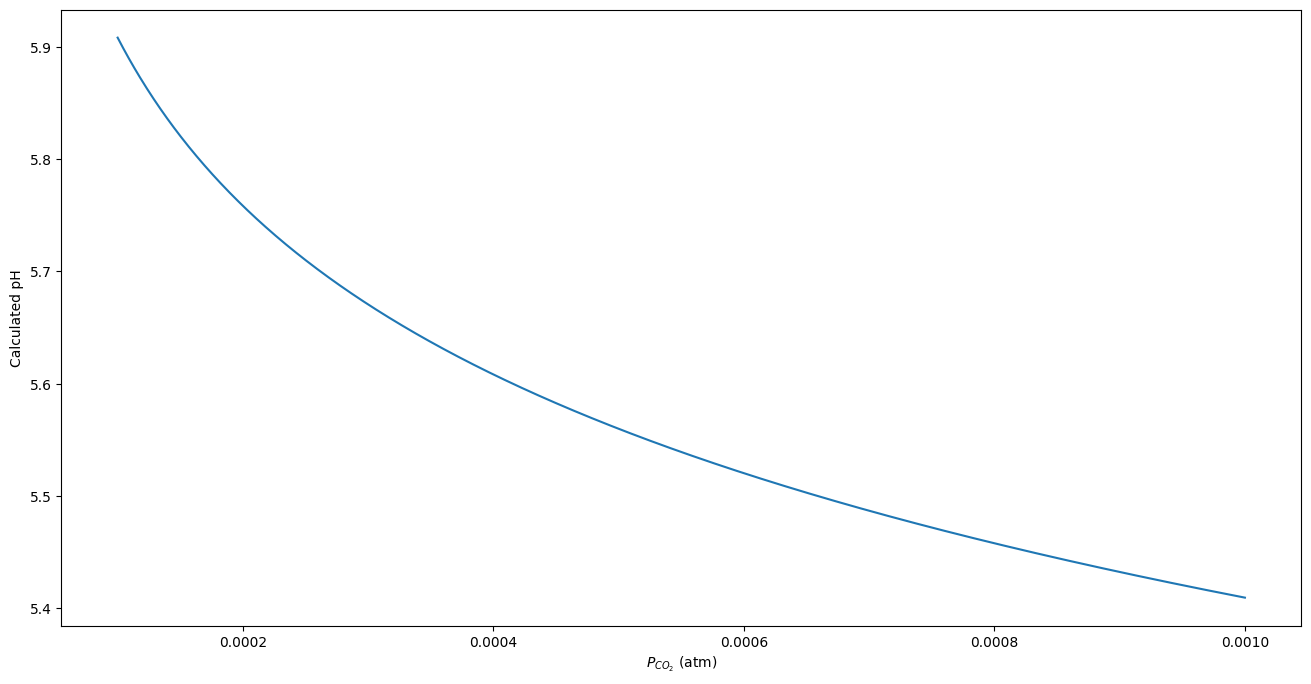

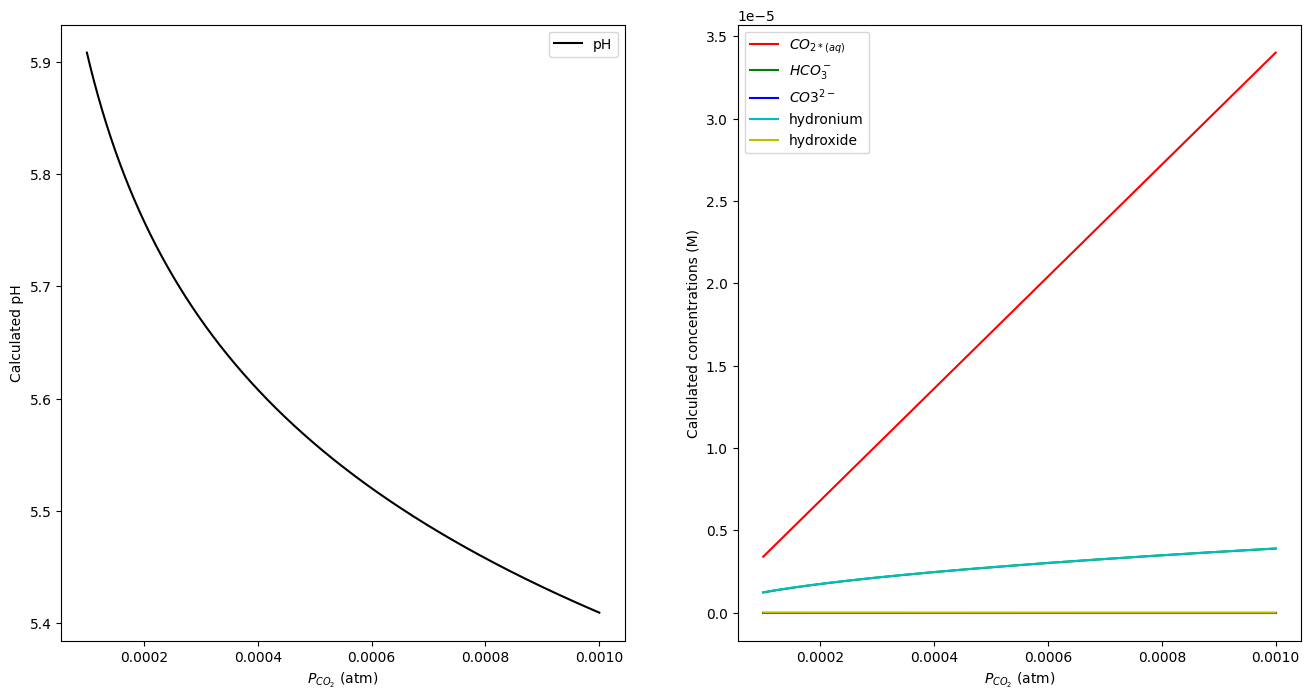

In [14]:
#MODIFIED CODE TO MATCH NOTATION
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

Kh=3.40e-2
Ka1=4.46e-7
Ka2=4.69e-11
Kw=1.0e-14
def f(x):
    f0=x[0]-(Kh)*(P) #Henry's Law, P is fixed - not adjustable
    f1=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f2=x[3]*x[2]-(Ka2)*x[1] #Ka2 of bicarbonate to carbonate
    f3=x[3]*x[4]-Kw #dissociation of water
    f4=x[1]+2*x[2]+x[4]-x[3] #charge balance
    return np.array([f0,f1,f2,f3,f4])

ppmvCO2=np.linspace(100,1000.0,1000)
pressures=ppmvCO2/1.0e6
#pressures=np.arange(100.0,1000.0,1)
#pressures=np.array([402])
#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
dfResults=pd.DataFrame(index=ppmvCO2,columns=["P (atm)","[CO2*]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","pH","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
for pressure,index in zip(pressures,range(len(pressures))):
    #initial guesses assuming independent equilibria
    P=pressure
    B=P*Kh #Calculates the initial dissolved CO2 using Henry's Law constant
    C=np.sqrt(Ka1*B) #initial guess for HCO3- concentration
    D=np.sqrt(Ka2*C) #initial guess for CO3 2- concentration
    E=C #initial guess for H+ concentration
    F=Kw/E #initial guess for OH- concentration
    x0=np.array([B,C,D,E,F]) #initial guess array

    x=fsolve(f,x0) #the fsolve function takes the array of 6 equations and solves for the 6 unknowns using the x0 array as initial guesses

    dfResults.iloc[index,0]=P #this puts the pressure of CO2 into the dataframe
    dfResults.iloc[index,1:6]=x #this puts the 6 concentrations into the dataframe (the notation "1:7" does not include the largest index and writes into indexes 1 to 6)
    dfResults.iloc[index,6]=-np.log10(x[3]) #this calculates the pH based on the solution for x[4]
    dfResults.iloc[index,7]=np.sum(f(x)) #this sums up the values of all the functions in the f(x) array. Valid solutions will yield residuals of zero or almost zero.

fig,ax=plt.subplots(figsize=(16,8))
ax.plot(dfResults["P (atm)"],dfResults["pH"])
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 equilibrium results.xlsx")
files.download("CO2 equilibrium results.xlsx")

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P (atm)"],dfResults["pH"],'k',label='pH')
ax2.plot(dfResults["P (atm)"],dfResults["[CO2*]"],'r',label=r'$CO_{2* (aq)}$')
ax2.plot(dfResults["P (atm)"],dfResults["[HCO3 -]"],'g',label=r'$HCO_3^-$')
ax2.plot(dfResults["P (atm)"],dfResults["[CO3 2-]"],'b',label=r'$CO3^{2-}$')
ax2.plot(dfResults["P (atm)"],dfResults["[H +]"],'c',label='hydronium')
ax2.plot(dfResults["P (atm)"],dfResults["[OH -]"],'y',label='hydroxide')
#ax2.plot(dfResults["P (atm)"],dfResults["[Ca 2+]"],'m',label='calcium')
ax2.legend()
ax.legend()
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()


# Cell Kevin is currently working on
$Eq_{0}$ $\mathrm{\color{Teal} {CO_{2 \,(g)}} \rightleftharpoons \color{Purple} {CO_{2 \,(aq)}}}$ $\textrm{where K}_{\textrm{Hn}} \textrm{ is } 3.40×10^{−2} $

$\qquad \mathrm{\color{Purple} {CO_{2 \,(aq)}} \color{Black}{+ H_2O_{(l)} \rightleftharpoons} \color{DarkOrange}{H_2CO_{3 \,(aq)}} \rightleftharpoons \color{Red} {H^+_{(aq)}}  \color{Black}{+ \,}  \color{Darkgreen} {HCO^-_{3 \, (aq)}}}$ $\textrm{where K}_{\textrm{Hy}} \textrm{ is } 1.7×10^{−3} \textrm{ and K}_{\textrm{a1}}^{'} \textrm{ is } 2.6×10^{−4}$

$\qquad \textrm{Note: because }\mathrm{\color{Purple} {CO_{2 \,(aq)}} {>}\color{DarkOrange}{H_2CO_{3 \,(aq)}} }\textrm{ these uncharged species are combined and written as }  \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} $

$\qquad \qquad \textrm{ where }\mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} = \mathrm{ \color{Purple} {CO_{2 \,(aq)}} + \color{DarkOrange}{H_2CO_{3 \,(aq)}}}$

$Eq_{1}$ $\mathrm{ \color{Purple}{CO^{*}_{2 \,(aq)}} \color{Black} + {H_2O_{(l)}}\rightleftharpoons \color{Red} {H^+_{(aq)}}  \color{Black}{+ \,}  \color{Darkgreen} {HCO^-_{3 \, (aq)}}} $ $\textrm{where K}_{\textrm{a1}} \textrm{ is } 4.46×10^{−7} $

$Eq_{2}$ $\mathrm{\color{Darkgreen} {HCO^-_{3 \, (aq)}} \rightleftharpoons \color{Red} {H^{+}_{(aq)}} \color{Black}{+ \,} \color{DarkBlue} {CO_{3 \, (aq)}^{2-}} }$ $\textrm{where K}_{\textrm{a2}} \textrm{ is } 4.69×10^{−11} $

$Eq_{3}$ $\mathrm{ \color{Black} {H_2O_{(l)} \rightleftharpoons \,} \color{Red}{H^{+}_{(aq)}} \color{Black}{+ \,} \color{Black} {OH^{-}_{(aq)}} } $ $\textrm{where K}_{\textrm{W}} \textrm{ is } 1.00×10^{−14} $

$Eq_{4}$ $\mathrm{ \color{Black} {CaCO_{3 \,(s)} \rightleftharpoons \,} \color{Brown}{Ca^{2+}_{(aq)}} \color{Black}{+ \,} \color{DarkBlue} {CO_{3 \, (aq)}^{2-}} } $ $\textrm{where K}_{\textrm{sp}} \textrm{ is } 4.6×10^{−9} $

$
  \begin{bmatrix}
  \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} & \mathrm{\color{Darkgreen}{HCO^-_{3 \, (aq)}}} & \mathrm{\color{DarkBlue} {CO_{3 \, (aq)}^{2-}}} & \mathrm{\color{Red}{H^{+}_{(aq)}}} & \mathrm{\color{Black} {OH^{-}_{(aq)}}} & \mathrm{\color{Brown}{Ca^{2+}_{(aq)}}}\\
  \end{bmatrix}
$

$
  \begin{bmatrix}
  \mathrm{\color{Purple}{X_{0}}} &  &  &  & \\
  \mathrm{\color{Purple}{X_{0}}} & \mathrm{\color{Darkgreen}{X_{1}}} &  & \mathrm{\color{Red}{X_{3}}} & \\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \\
  &  &  & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}}\\
  &  &  \mathrm{\color{DarkBlue}{X_{2}}} & & & \mathrm{\color{Brown} {X_{5}}}\\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}} & \mathrm{\color{Brown} {X_{5}}}\\
  \end{bmatrix}=
  \begin{bmatrix} \mathrm{K_{H}^{ }*\color{teal}{P}} \\ \mathrm{K_{a1}^{ }} \\ \mathrm{K_{a2}^{ }} \\ \mathrm{K_{W}^{ }} \\ \mathrm{K_{sp}^{ }} \\ \mathrm{CB}_{ }^{ }  \end{bmatrix}
  =
  \begin{bmatrix} 3.40×10^{−2} *  \mathrm{\color{teal}{P}} \\ 4.46×10^{−7} \\ 4.69×10^{−11} \\ 1.00×10^{−14} \\ 4.6×10^{−9} \\ 0  \end{bmatrix}
$


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

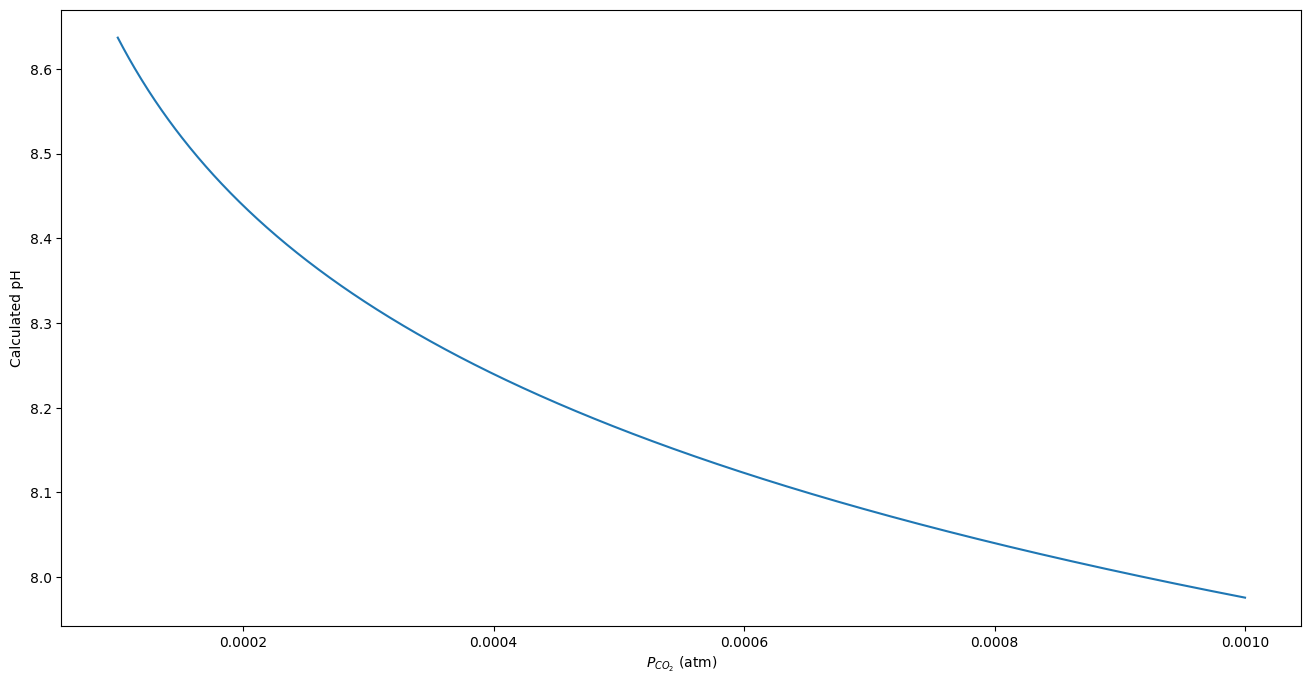

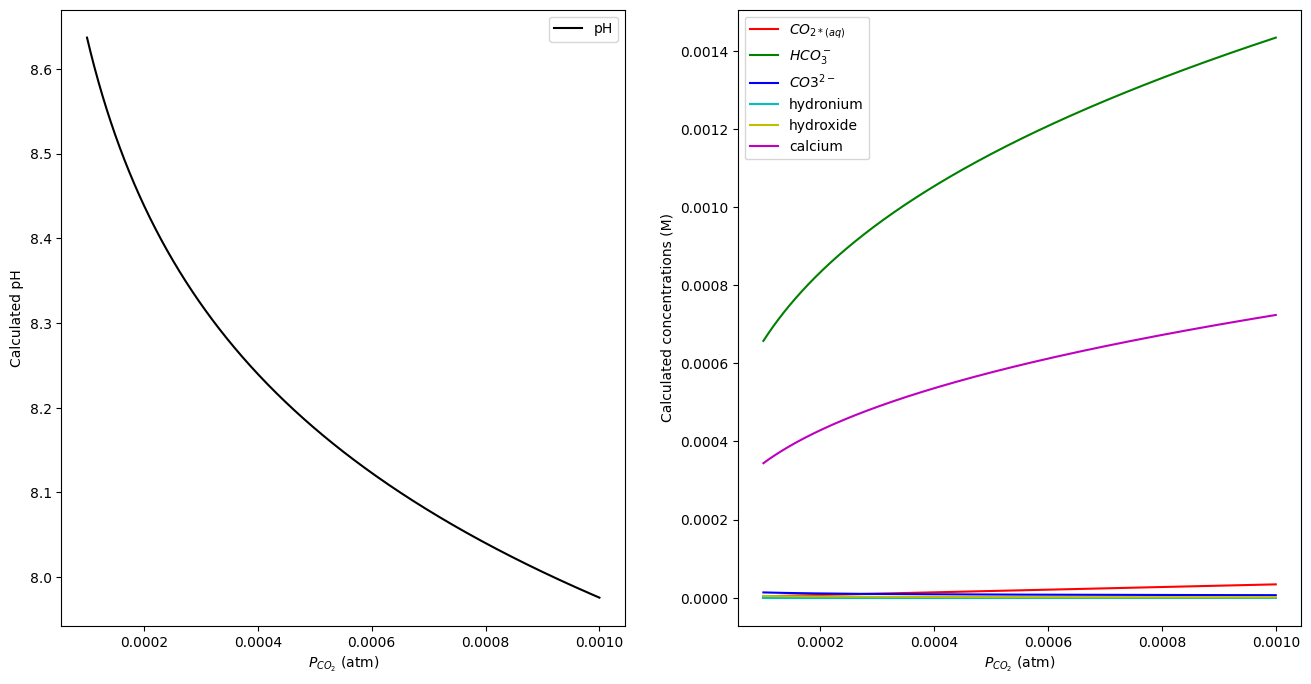

In [15]:
#MODIFIED CODE TO ADD CALCITE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

Kh=3.40e-2
Ka1=4.46e-7
Ka2=4.69e-11
Kw=1.0e-14
Ksp=4.6e-9
def f(x):
    f0=x[0]-(Kh)*(P) #Henry's Law, P is fixed - not adjustable
    f1=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f2=x[3]*x[2]-(Ka2)*x[1] #Ka2 of bicarbonate to carbonate
    f3=x[3]*x[4]-Kw #dissociation of water
    f4=x[2]*x[5]-Ksp #dissociation of water
    f5=x[1]+(2*x[2])+x[4]-x[3]-(2*x[5]) #charge balance
    return np.array([f0,f1,f2,f3,f4,f5])

ppmvCO2=np.linspace(100.0,1000.0,1000)
pressures=ppmvCO2/1.0e6
#pressures=np.arange(100.0,1000.0,1)
#pressures=np.array([402])
#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
dfResults=pd.DataFrame(index=ppmvCO2,columns=["P (atm)","[CO2*]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","[Ca 2+]","pH","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
for pressure,index in zip(pressures,range(len(pressures))):
    if index==0:
      #initial guesses assuming independent equilibria
      P=pressure
      B=P*Kh #Calculates the initial dissolved CO2 using Henry's Law constant
      E=10**-8.3 #initial guess for H+ concentration
      F=Kw/E #initial guess for OH- concentration
      C=Ka1*B/E #initial guess for HCO3- concentration
      D=Ka2*C/E #initial guess for CO3 2- concentration
      G=Ksp/D
      x0=np.array([B,C,D,E,F,G]) #initial guess array
    else:
      P=pressure
      x0=np.array(dfResults.iloc[index-1,1:7],dtype=float)
    x=fsolve(f,x0) #the fsolve function takes the array of 6 equations and solves for the 6 unknowns using the x0 array as initial guesses
    dfResults.iloc[index,0]=P #this puts the pressure of CO2 into the dataframe
    dfResults.iloc[index,1:7]=x #this puts the 6 concentrations into the dataframe (the notation "1:7" does not include the largest index and writes into indexes 1 to 6)
    dfResults.iloc[index,7]=-np.log10(x[3]) #this calculates the pH based on the solution for x[4]
    dfResults.iloc[index,8]=np.sum(f(x)) #this sums up the values of all the functions in the f(x) array. Valid solutions will yield residuals of zero or almost zero.

fig,ax=plt.subplots(figsize=(16,8))
ax.plot(dfResults["P (atm)"],dfResults["pH"])
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 equilibrium results.xlsx")
files.download("CO2 equilibrium results.xlsx")

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P (atm)"],dfResults["pH"],'k',label='pH')
ax2.plot(dfResults["P (atm)"],dfResults["[CO2*]"],'r',label=r'$CO_{2* (aq)}$')
ax2.plot(dfResults["P (atm)"],dfResults["[HCO3 -]"],'g',label=r'$HCO_3^-$')
ax2.plot(dfResults["P (atm)"],dfResults["[CO3 2-]"],'b',label=r'$CO3^{2-}$')
ax2.plot(dfResults["P (atm)"],dfResults["[H +]"],'c',label='hydronium')
ax2.plot(dfResults["P (atm)"],dfResults["[OH -]"],'y',label='hydroxide')
ax2.plot(dfResults["P (atm)"],dfResults["[Ca 2+]"],'m',label='calcium')
ax2.legend()
ax.legend()
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()

K0 = 0.02867953397422081
Ka1 = 1.4218281371391736e-06
Ka2 = 1.0815547472209423e-09
Kw = 6.029412474038209e-14
Ksp calcite = 4.272350927862591e-07


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

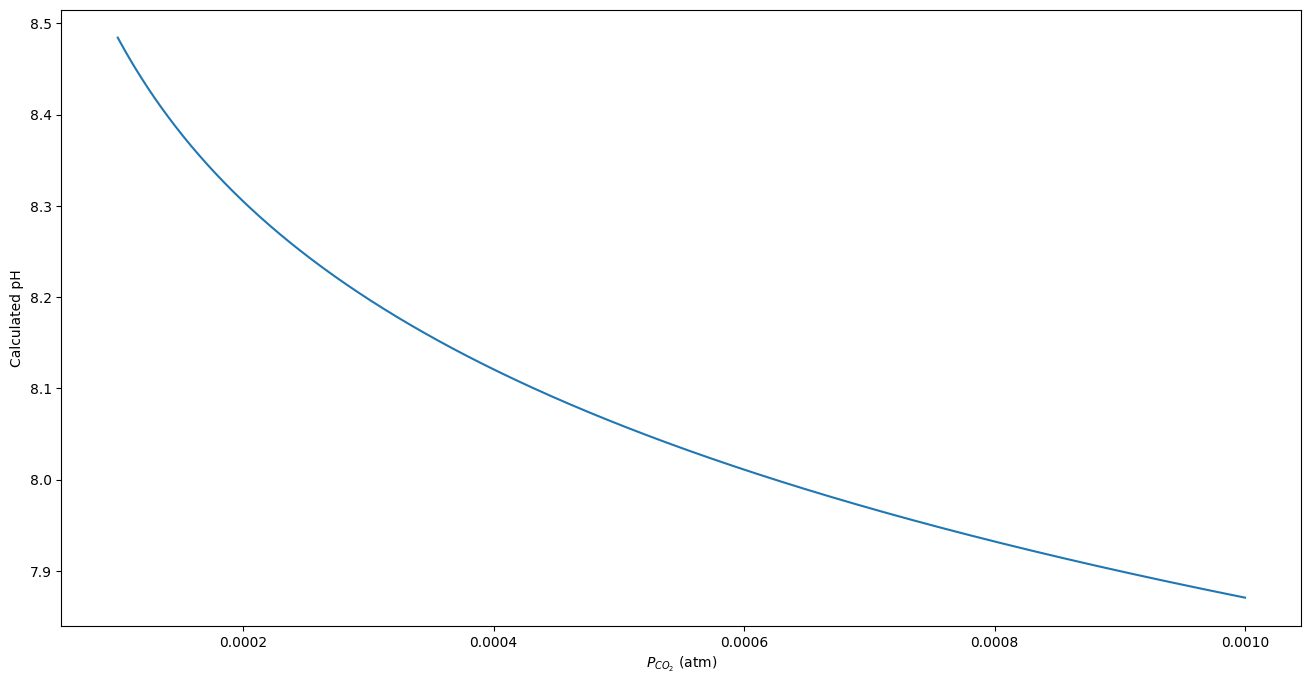

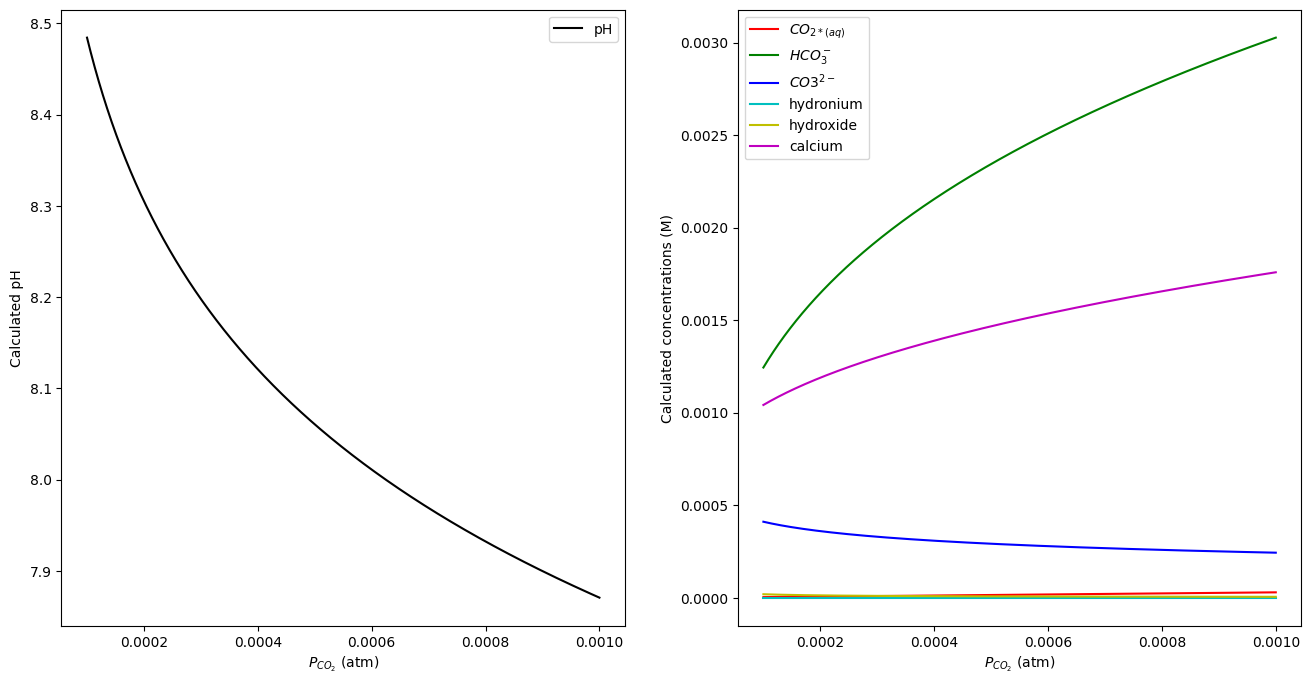

In [19]:
#MODIFIED TO CORRECT FOR SALINITY AND TEMPERATURE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

flgCorrectForTempAndSal=True

if flgCorrectForTempAndSal==True:
    temp=25+273.15
    sal=35

    Kh=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
    print("K0 = "+str(Kh))
    Ka1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
    #print(-np.log10(eqK1))
    print("Ka1 = "+str(Ka1))
    Ka2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
    #print(-np.log10(eqK2))
    print("Ka2 = "+str(Ka2))
    Kw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
    print("Kw = "+str(Kw))
    Ksp=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
    print("Ksp calcite = "+str(Ksp))
else:
    Kh=3.40e-2
    Ka1=4.46e-7
    Ka2=4.69e-11
    Kw=1.0e-14
    Ksp=4.6e-9

def f(x):
    f0=x[0]-(Kh)*(P) #Henry's Law, P is fixed - not adjustable
    f1=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f2=x[3]*x[2]-(Ka2)*x[1] #Ka2 of bicarbonate to carbonate
    f3=x[3]*x[4]-Kw #dissociation of water
    f4=x[2]*x[5]-Ksp #dissociation of water
    f5=x[1]+(2*x[2])+x[4]-x[3]-(2*x[5]) #charge balance
    return np.array([f0,f1,f2,f3,f4,f5])

ppmvCO2=np.linspace(100.0,1000.0,1000)
pressures=ppmvCO2/1.0e6
#pressures=np.arange(100.0,1000.0,1)
#pressures=np.array([402])
#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
dfResults=pd.DataFrame(index=ppmvCO2,columns=["P (atm)","[CO2*]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","[Ca 2+]","pH","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
for pressure,index in zip(pressures,range(len(pressures))):
    if index==0:
      #initial guesses assuming independent equilibria
      P=pressure
      B=P*Kh #Calculates the initial dissolved CO2 using Henry's Law constant
      E=10**-8.3 #initial guess for H+ concentration
      F=Kw/E #initial guess for OH- concentration
      C=Ka1*B/E #initial guess for HCO3- concentration
      D=Ka2*C/E #initial guess for CO3 2- concentration
      G=Ksp/D
      x0=np.array([B,C,D,E,F,G]) #initial guess array
    else:
      P=pressure
      x0=np.array(dfResults.iloc[index-1,1:7],dtype=float)
    x=fsolve(f,x0) #the fsolve function takes the array of 6 equations and solves for the 6 unknowns using the x0 array as initial guesses
    dfResults.iloc[index,0]=P #this puts the pressure of CO2 into the dataframe
    dfResults.iloc[index,1:7]=x #this puts the 6 concentrations into the dataframe (the notation "1:7" does not include the largest index and writes into indexes 1 to 6)
    dfResults.iloc[index,7]=-np.log10(x[3]) #this calculates the pH based on the solution for x[4]
    dfResults.iloc[index,8]=np.sum(f(x)) #this sums up the values of all the functions in the f(x) array. Valid solutions will yield residuals of zero or almost zero.

fig,ax=plt.subplots(figsize=(16,8))
ax.plot(dfResults["P (atm)"],dfResults["pH"])
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 equilibrium results.xlsx")
files.download("CO2 equilibrium results.xlsx")

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P (atm)"],dfResults["pH"],'k',label='pH')
ax2.plot(dfResults["P (atm)"],dfResults["[CO2*]"],'r',label=r'$CO_{2* (aq)}$')
ax2.plot(dfResults["P (atm)"],dfResults["[HCO3 -]"],'g',label=r'$HCO_3^-$')
ax2.plot(dfResults["P (atm)"],dfResults["[CO3 2-]"],'b',label=r'$CO3^{2-}$')
ax2.plot(dfResults["P (atm)"],dfResults["[H +]"],'c',label='hydronium')
ax2.plot(dfResults["P (atm)"],dfResults["[OH -]"],'y',label='hydroxide')
ax2.plot(dfResults["P (atm)"],dfResults["[Ca 2+]"],'m',label='calcium')
ax2.legend()
ax.legend()
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()

In [ ]:
#Part IV: Insert code that defines f(x) as an array of functions f0 - f5
#Part V: insert code that calculates initial estimates for each aqueous species given the atmospheric partial pressure of CO2
#Part VI:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

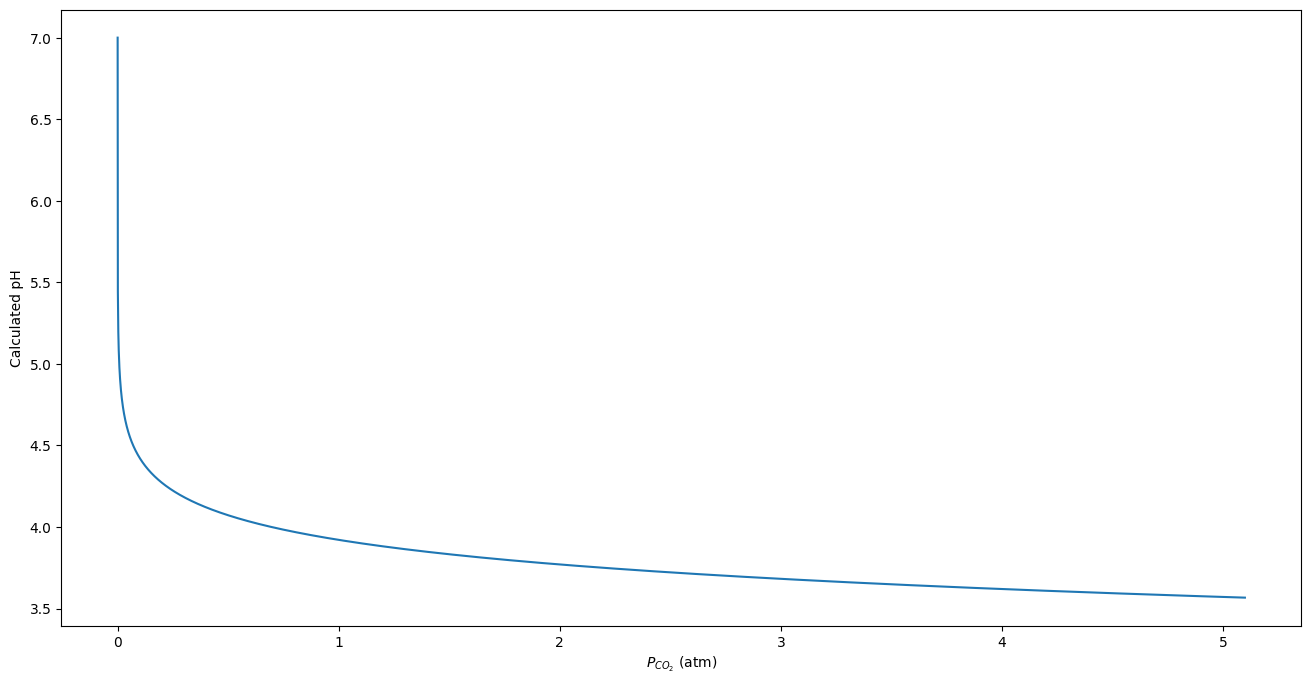

In [ ]:
#OLDER CODE CELL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

def f(x):
    f0=x[1]-(1.7e-3)*(x[0]) #these two are often combined
    f1=x[4]*x[2]-(2.5e-4)*x[1] # to give Ka1 of 4.46e-7
    f2=x[4]*x[3]-(4.69e-11)*x[2]
    f3=x[4]*x[5]-1.0e-14
    f4=x[2]+2*x[3]+x[5]-x[4]
    f5=x[0]+x[1]+x[2]+x[3]-B
    return np.array([f0,f1,f2,f3,f4,f5])

#creates an array for the initial partial pressure of CO2 in atm with a range of 0 to 5 atm and step size 0.001
#must use numpy arange() because range() only allows integers
#P=np.array(np.arange(0,5.1,0.001))
#further defines low pressure and high pressure ranges with different step sizes
#pressures=np.arange(0,0.1,0.001)
#pressures=np.arange(0.1,5.1,0.1)

#creates an array for the initial partial pressure of CO2 in atm with a range of 0 to 5 atm and step size 0.001
pressures=np.arange(0,5.1,0.001)

#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
dfResults=pd.DataFrame(index=pressures,columns=["P","[CO2]","[H2CO3]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","pH","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
for pressure,index in zip(pressures,range(len(pressures))):
    #initial guesses assuming independent equilibria
    B=pressure*0.034 #Calculates the initial dissolved CO2 using Henry's Law constant
    C=0.0017*B #initial guess for H2CO3 concentration
    D=np.sqrt(0.00025*C) #initial guess for HCO3- concentration
    E=np.sqrt(4.69e-11*D) #initial guess for CO3 2- concentration
    F=np.sqrt(1e-14) #initial guess for H+ concentration
    G=np.sqrt(1e-14) #initial guess for OH- concentration
    x0=np.array([B,C,D,E,F,G]) #initial guess array

    x=fsolve(f,x0) #the fsolve function takes the array of 6 equations and solves for the 6 unknowns using the x0 array as initial guesses

    dfResults.iloc[index,0]=pressure #this puts the pressure of CO2 into the dataframe
    dfResults.iloc[index,1:7]=x #this puts the 6 concentrations into the dataframe (the notation "1:7" does not include the largest index and writes into indexes 1 to 6)
    dfResults.iloc[index,7]=-np.log10(x[4]) #this calculates the pH based on the solution for x[4]
    dfResults.iloc[index,8]=np.sum(f(x)) #this sums up the values of all the functions in the f(x) array. Valid solutions will yield residuals of zero or almost zero.

fig,ax=plt.subplots(figsize=(16,8))
ax.plot(dfResults["P"],dfResults["pH"])
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 equilibrium results.xlsx")
files.download("CO2 equilibrium results.xlsx")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.7 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                 P [CO2_H2CO3]  [HCO3 -]  [CO3 2-] [H +]    [OH -]   [Ca 2+]  \
0.000100    0.0001    0.000003  0.000659  0.000013   0.0  0.000004  0.000345   
0.000101  0.000101    0.000003  0.000661  0.000013   0.0  0.000004  0.000346   
0.000102  0.000102    0.000003  0.000663  0.000013   0.0  0.000004  0.000347   
0.000103  0.000103    0.000004  0.000666  0.000013   0.0  0.000004  0.000348   
0.000104  0.000104    0.000004  0.000668  0.000013   0.0  0.000004  0.000349   
...            ...         ...       ...       ...   ...       ...       ...   
0.000995  0.000995    0.000034  0.001434  0.000006   0.0  0.000001  0.000724   
0.000996  0.000996    0.000034  0.001435  0.000006   0.0  0.000001  0.000724   
0.000997  0.000997    0.000034  0.001435  0.000006   0.0  0.000001  0.000725   
0.000998  0.000998    0.000034  0.001436  0.000006   0.0  0.000001  0.000725   
0.000999  0.000999    0.000034  0.001436  0.000006   0.0  0.000001  0.000725   

                pH residuals  
0.000100

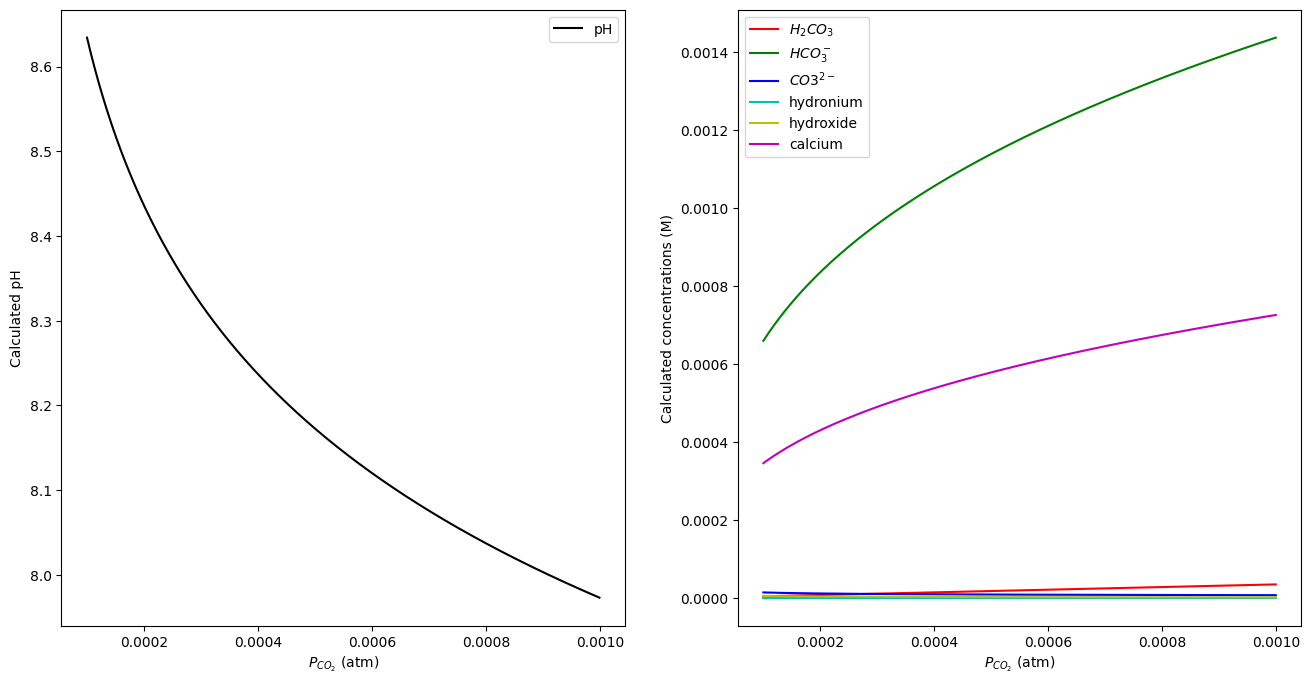

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
!pip install xlsxwriter
import xlsxwriter as xlsx
from google.colab import files

flgCorrectForTempAndSal=False

if flgCorrectForTempAndSal==True:
    temp=25+273.15
    sal=35

    eqKo=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
    print("K0 = "+str(eqKo))
    eqK1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
    #print(-np.log10(eqK1))
    print("Ka1 = "+str(eqK1))
    eqK2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
    #print(-np.log10(eqK2))
    print("Ka2 = "+str(eqK2))
    eqKw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
    print("Kw = "+str(eqKw))
    eqKspCalcite=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
    print("Ksp calcite = "+str(eqKspCalcite))
    eqK2effSea = 10**-(1394.7/temp + 4.77 - 0.0184*sal + 0.000118*sal**2)
    print("K0 = "+str(eqK2effSea))
else:
    eqKo=3.4e-2
    eqK1=4.5e-7
    eqK2=4.7e-11
    eqKspCalcite=4.6e-9
    eqKw=1.0e-14

def carbonDioxideInSeawaterPos(concs):
  #fugacityCO2=concs[0]
  carbonicAndDissolvedCO2=concs[0]**2
  bicarbonate=concs[1]**2
  carbonate=concs[2]**2
  hydronium=concs[3]**2
  hydroxide=concs[4]**2
  calcium=concs[5]**2
  henry=carbonicAndDissolvedCO2/fugacityCO2**2-eqKo**2
  acid1=hydronium*bicarbonate/carbonicAndDissolvedCO2-eqK1**2
  acid2=hydronium*carbonate/bicarbonate-eqK2**2
  autodissociation=hydronium*hydroxide-eqKw**2
  #massBalanceCarbon=carbonicAndDissolvedCO2+bicarbonate+carbonate-(fugacityCO2*eqKo)
  chargeBalance=bicarbonate+2**2*carbonate+hydroxide-hydronium-2**2*calcium
  calcite=calcium*carbonate-eqKspCalcite**2
  #return np.array([henry,acid1,acid2,autodissociation,massBalanceCarbon,chargeBalance])
  return np.array([henry,acid1,acid2,autodissociation,chargeBalance,calcite])

def carbonDioxideInSeawater(concs):
  #fugacityCO2=concs[0]
  carbonicAndDissolvedCO2=concs[0]
  bicarbonate=concs[1]
  carbonate=concs[2]
  hydronium=concs[3]
  hydroxide=concs[4]
  calcium=concs[5]
  henry=carbonicAndDissolvedCO2/fugacityCO2-eqKo
  acid1=hydronium*bicarbonate/carbonicAndDissolvedCO2-eqK1
  acid2=hydronium*carbonate/bicarbonate-eqK2
  autodissociation=hydronium*hydroxide-eqKw
  #massBalanceCarbon=carbonicAndDissolvedCO2+bicarbonate+carbonate-(fugacityCO2*eqKo)
  chargeBalance=bicarbonate+2*carbonate+hydroxide-hydronium-2*calcium
  calcite=calcium*carbonate-eqKspCalcite
  #return np.array([henry,acid1,acid2,autodissociation,massBalanceCarbon,chargeBalance])
  returnVals=np.array([henry,acid1,acid2,autodissociation,chargeBalance,calcite])
  return returnVals

pressures=np.arange(100.0,1000.0,1)/1e6
dfResults=pd.DataFrame(index=pressures,columns=["P","[CO2_H2CO3]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","[Ca 2+]","pH","residuals"])

for pressure,index in zip(pressures,range(len(pressures))):
  #pressure=410.0/1e6
  if index==0:
      fugacityCO2=pressure
      # carbonicAndDissolvedCO2=pressure*eqKo
      # bicarbonate=np.sqrt(eqK1*carbonicAndDissolvedCO2)
      # carbonate=np.sqrt(eqK2*bicarbonate)
      # hydronium=2e-9
      # hydroxide=eqKw/hydronium
      # calcium=np.sqrt(eqKspCalcite)
      # intialGuesses=np.array([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium])
      intialGuesses=np.array([3.40000000e-06, 6.58885243e-04, 1.33360124e-05, 2.32210391e-09, 4.30643949e-06, 3.44930692e-04])
  else:
      fugacityCO2=pressure
      intialGuesses=np.array(dfResults.iloc[index-1,1:7],dtype=float)

  #fsolve
  [carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawater,intialGuesses)
  #[carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawaterPos,intialGuesses)
  dfResults.iloc[index,0]=pressure
  dfResults.iloc[index,1]=carbonicAndDissolvedCO2
  dfResults.iloc[index,2]=bicarbonate
  dfResults.iloc[index,3]=carbonate
  dfResults.iloc[index,4]=hydronium
  dfResults.iloc[index,5]=hydroxide
  dfResults.iloc[index,6]=calcium
  dfResults.iloc[index,7]=-np.log10(hydronium)
  dfResults.iloc[index,8]=np.sum(carbonDioxideInSeawater([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]))

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P"],dfResults["pH"],'k',label='pH')
ax2.plot(dfResults["P"],dfResults["[CO2_H2CO3]"],'r',label=r'$H_2CO_3$')
ax2.plot(dfResults["P"],dfResults["[HCO3 -]"],'g',label=r'$HCO_3^-$')
ax2.plot(dfResults["P"],dfResults["[CO3 2-]"],'b',label=r'$CO3^{2-}$')
ax2.plot(dfResults["P"],dfResults["[H +]"],'c',label='hydronium')
ax2.plot(dfResults["P"],dfResults["[OH -]"],'y',label='hydroxide')
ax2.plot(dfResults["P"],dfResults["[Ca 2+]"],'m',label='calcium')
ax2.legend()
ax.legend()
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 Equilibrium Results.xlsx")
files.download("CO2 Equilibrium Results.xlsx")
print(dfResults)

K0 = 1.7549826440904572
Ka1 = 1.4218281371391736e-06
Ka2 = 1.0815547472209423e-09
Kw = 6.029412474038209e-14
Ksp calcite = 4.272350927862591e-07
K = 1.1261682484807061e-09
[0.0006844432311952783, 0.00909993412470799, 9.203234056319665e-05, 1.0694150427972237e-07, 5.63800391929869e-07, 0.0046422278323610695]
6.970853711241963


In [ ]:


def carbonDioxideInSeawater(concs):
  #fugacityCO2=concs[0]
  carbonicAndDissolvedCO2=concs[0]
  bicarbonate=concs[1]
  carbonate=concs[2]
  hydronium=concs[3]
  hydroxide=concs[4]

  henry=carbonicAndDissolvedCO2/fugacityCO2-eqKo
  acid1=hydronium*bicarbonate/carbonicAndDissolvedCO2-eqK1
  acid2=hydronium*carbonate/bicarbonate-eqK2
  autodissociation=hydronium*hydroxide-eqKw
  massBalanceCarbon=carbonicAndDissolvedCO2+bicarbonate+carbonate-(fugacityCO2*eqKo)
  chargeBalance=bicarbonate+2*carbonate+hydroxide-hydronium
  #return np.array([henry,acid1,acid2,autodissociation,massBalanceCarbon,chargeBalance])
  returnVals=np.array([henry,acid1,acid2,autodissociation,chargeBalance])
  return returnVals

eqKo=3.4e-2
eqK1=4.5e-7
eqK2=4.7e-11
#eqKspCalcite=4.6e-9
eqKw=1.0e-14
pressures=np.arange(100.0,1000.0,1)/1e6
dfResults=pd.DataFrame(index=pressures,columns=["P","[CO2_H2CO3]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","[Ca 2+]","pH","residuals"])

for pressure,index in zip(pressures,range(len(pressures))):
  #pressure=410.0/1e6
  if index==0:
      fugacityCO2=pressure
      # carbonicAndDissolvedCO2=pressure*eqKo
      # bicarbonate=np.sqrt(eqK1*carbonicAndDissolvedCO2)
      # carbonate=np.sqrt(eqK2*bicarbonate)
      # hydronium=2e-9
      # hydroxide=eqKw/hydronium
      # calcium=np.sqrt(eqKspCalcite)
      # intialGuesses=np.array([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium])
      intialGuesses=np.array([3.40000000e-06, 6.58885243e-04, 1.33360124e-05, 2.32210391e-09, 4.30643949e-06, 3.44930692e-04])
  else:
      fugacityCO2=pressure
      intialGuesses=np.array(dfResults.iloc[index-1,1:7],dtype=float)

  #fsolve
  [carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawater,intialGuesses)
  #[carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawaterPos,intialGuesses)
  dfResults.iloc[index,0]=pressure
  dfResults.iloc[index,1]=carbonicAndDissolvedCO2
  dfResults.iloc[index,2]=bicarbonate
  dfResults.iloc[index,3]=carbonate
  dfResults.iloc[index,4]=hydronium
  dfResults.iloc[index,5]=hydroxide
  dfResults.iloc[index,6]=calcium
  dfResults.iloc[index,7]=-np.log10(hydronium)
  dfResults.iloc[index,8]=np.sum(carbonDioxideInSeawater([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]))

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P"],dfResults["pH"],'k',label='pH')
ax2.plot(dfResults["P"],dfResults["[CO2_H2CO3]"],'r',label=r'$H_2CO_3$')
ax2.plot(dfResults["P"],dfResults["[HCO3 -]"],'g',label=r'$HCO_3^-$')
ax2.plot(dfResults["P"],dfResults["[CO3 2-]"],'b',label=r'$CO3^{2-}$')
ax2.plot(dfResults["P"],dfResults["[H +]"],'c',label='hydronium')
ax2.plot(dfResults["P"],dfResults["[OH -]"],'y',label='hydroxide')
ax2.plot(dfResults["P"],dfResults["[Ca 2+]"],'m',label='calcium')
ax2.legend()
ax.legend()
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 Equilibrium Results.xlsx")
files.download("CO2 Equilibrium Results.xlsx")
print(dfResults)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
!pip install xlsxwriter
import xlsxwriter as xlsx
from google.colab import files

flgCorrectForTempAndSal=False

if flgCorrectForTempAndSal==True:
    temp=25+273.15
    sal=35

    eqKo=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
    print("K0 = "+str(eqKo))
    eqK1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
    #print(-np.log10(eqK1))
    print("Ka1 = "+str(eqK1))
    eqK2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
    #print(-np.log10(eqK2))
    print("Ka2 = "+str(eqK2))
    eqKw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
    print("Kw = "+str(eqKw))
    eqKspCalcite=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
    print("Ksp calcite = "+str(eqKspCalcite))
    eqK2effSea = 10**-(1394.7/temp + 4.77 - 0.0184*sal + 0.000118*sal**2)
    print("K0 = "+str(eqK2effSea))
else:
    eqKo=3.4e-2
    eqK1=4.5e-7
    eqK2=4.7e-11
    eqKspCalcite=4.6e-9
    eqKw=1.0e-14

def carbonDioxideInSeawaterPos(concs):
  #fugacityCO2=concs[0]
  carbonicAndDissolvedCO2=concs[0]**2
  bicarbonate=concs[1]**2
  carbonate=concs[2]**2
  hydronium=concs[3]**2
  hydroxide=concs[4]**2
  calcium=concs[5]**2
  henry=carbonicAndDissolvedCO2/fugacityCO2**2-eqKo**2
  acid1=hydronium*bicarbonate/carbonicAndDissolvedCO2-eqK1**2
  acid2=hydronium*carbonate/bicarbonate-eqK2**2
  autodissociation=hydronium*hydroxide-eqKw**2
  #massBalanceCarbon=carbonicAndDissolvedCO2+bicarbonate+carbonate-(fugacityCO2*eqKo)
  chargeBalance=bicarbonate+2**2*carbonate+hydroxide-hydronium-2**2*calcium
  calcite=calcium*carbonate-eqKspCalcite**2
  #return np.array([henry,acid1,acid2,autodissociation,massBalanceCarbon,chargeBalance])
  return np.array([henry,acid1,acid2,autodissociation,chargeBalance,calcite])

def carbonDioxideInSeawater(concs):
  #fugacityCO2=concs[0]
  carbonicAndDissolvedCO2=concs[0]
  bicarbonate=concs[1]
  carbonate=concs[2]
  hydronium=concs[3]
  hydroxide=concs[4]
  calcium=concs[5]
  henry=carbonicAndDissolvedCO2/fugacityCO2-eqKo
  acid1=hydronium*bicarbonate/carbonicAndDissolvedCO2-eqK1
  acid2=hydronium*carbonate/bicarbonate-eqK2
  autodissociation=hydronium*hydroxide-eqKw
  #massBalanceCarbon=carbonicAndDissolvedCO2+bicarbonate+carbonate-(fugacityCO2*eqKo)
  chargeBalance=bicarbonate+2*carbonate+hydroxide-hydronium-2*calcium
  calcite=calcium*carbonate-eqKspCalcite
  #return np.array([henry,acid1,acid2,autodissociation,massBalanceCarbon,chargeBalance])
  returnVals=np.array([henry,acid1,acid2,autodissociation,chargeBalance,calcite])
  return returnVals

pressures=np.arange(100.0,1000.0,1)/1e6
dfResults=pd.DataFrame(index=pressures,columns=["P","[CO2_H2CO3]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","[Ca 2+]","pH","residuals"])

for pressure,index in zip(pressures,range(len(pressures))):
  #pressure=410.0/1e6
  if index==0:
      fugacityCO2=pressure
      # carbonicAndDissolvedCO2=pressure*eqKo
      # bicarbonate=np.sqrt(eqK1*carbonicAndDissolvedCO2)
      # carbonate=np.sqrt(eqK2*bicarbonate)
      # hydronium=2e-9
      # hydroxide=eqKw/hydronium
      # calcium=np.sqrt(eqKspCalcite)
      # intialGuesses=np.array([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium])
      intialGuesses=np.array([3.40000000e-06, 6.58885243e-04, 1.33360124e-05, 2.32210391e-09, 4.30643949e-06, 3.44930692e-04])
  else:
      fugacityCO2=pressure
      intialGuesses=np.array(dfResults.iloc[index-1,1:7],dtype=float)

  #fsolve
  [carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawater,intialGuesses)
  #[carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawaterPos,intialGuesses)
  dfResults.iloc[index,0]=pressure
  dfResults.iloc[index,1]=carbonicAndDissolvedCO2
  dfResults.iloc[index,2]=bicarbonate
  dfResults.iloc[index,3]=carbonate
  dfResults.iloc[index,4]=hydronium
  dfResults.iloc[index,5]=hydroxide
  dfResults.iloc[index,6]=calcium
  dfResults.iloc[index,7]=-np.log10(hydronium)
  dfResults.iloc[index,8]=np.sum(carbonDioxideInSeawater([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]))

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P"],dfResults["pH"],'k',label='pH')
ax2.plot(dfResults["P"],dfResults["[CO2_H2CO3]"],'r',label=r'$H_2CO_3$')
ax2.plot(dfResults["P"],dfResults["[HCO3 -]"],'g',label=r'$HCO_3^-$')
ax2.plot(dfResults["P"],dfResults["[CO3 2-]"],'b',label=r'$CO3^{2-}$')
ax2.plot(dfResults["P"],dfResults["[H +]"],'c',label='hydronium')
ax2.plot(dfResults["P"],dfResults["[OH -]"],'y',label='hydroxide')
ax2.plot(dfResults["P"],dfResults["[Ca 2+]"],'m',label='calcium')
ax2.legend()
ax.legend()
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 Equilibrium Results.xlsx")
files.download("CO2 Equilibrium Results.xlsx")
print(dfResults)

TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument 'carbonDioxideInSeawater'.Shape should be (6,) but it is (5,).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

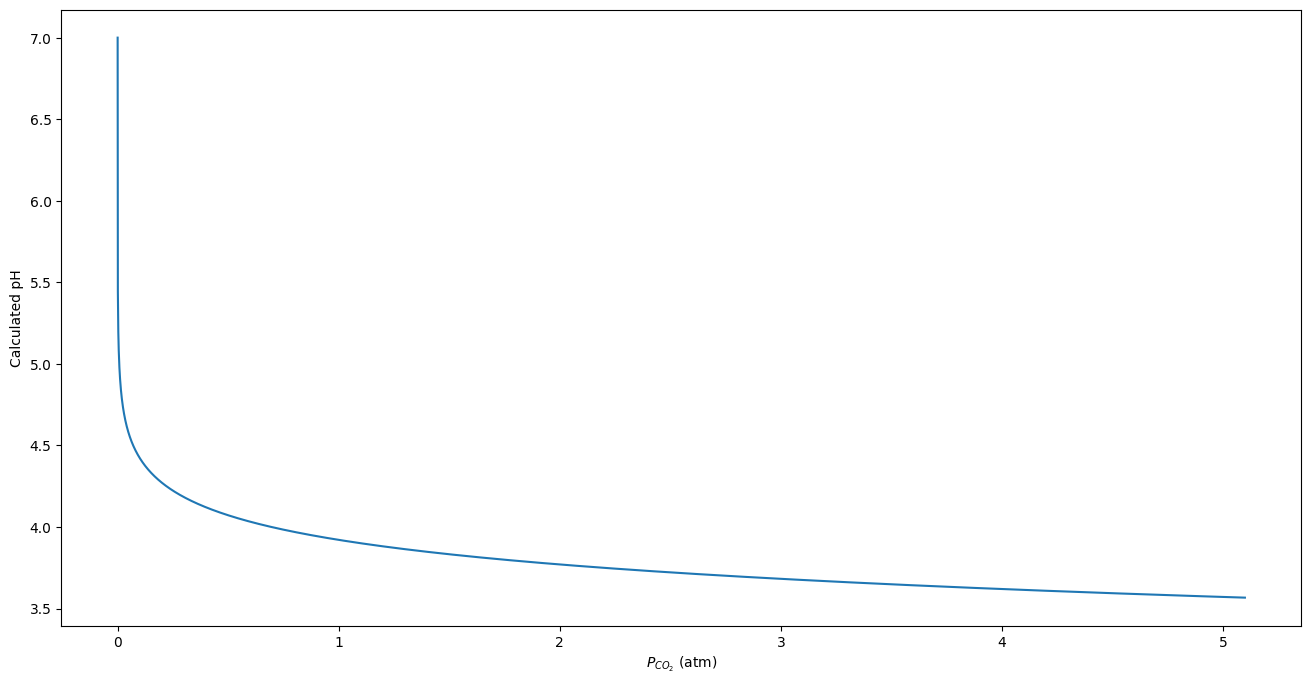

In [ ]:
# Code Kevin is working on
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

def f(x):
    f0=x[1]-(3.4e-2)*(x[0])
    f1=x[4]*x[2]-(4.46e-7)*x[1]
    f2=x[4]*x[3]-(4.69e-11)*x[2]
    f3=x[4]*x[5]-1.0e-14
    f4=x[2]+2*x[3]+x[5]-x[4]
    f5=x[0]+x[1]+x[2]+x[3]-B
    return np.array([f0,f1,f2,f3,f4,f5])

#creates an array for the initial partial pressure of CO2 in atm with a range of 0 to 5 atm and step size 0.001
#must use numpy arange() because range() only allows integers
#P=np.array(np.arange(0,5.1,0.001))
#further defines low pressure and high pressure ranges with different step sizes
#pressures=np.arange(0,0.1,0.001)
#pressures=np.arange(0.1,5.1,0.1)

#creates an array for the initial partial pressure of CO2 in atm with a range of 0 to 5 atm and step size 0.001
pressures=np.arange(0,5.1,0.001)

#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
dfResults=pd.DataFrame(index=pressures,columns=["P","[CO2]","[H2CO3]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","pH","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
for pressure,index in zip(pressures,range(len(pressures))):
    #initial guesses assuming independent equilibria
    B=pressure*0.034 #Calculates the initial dissolved CO2 using Henry's Law constant
    C=0.0017*B #initial guess for H2CO3 concentration
    D=np.sqrt(0.00025*C) #initial guess for HCO3- concentration
    E=np.sqrt(4.69e-11*D) #initial guess for CO3 2- concentration
    F=np.sqrt(1e-14) #initial guess for H+ concentration
    G=np.sqrt(1e-14) #initial guess for OH- concentration
    x0=np.array([B,C,D,E,F,G]) #initial guess array

    x=fsolve(f,x0) #the fsolve function takes the array of 6 equations and solves for the 6 unknowns using the x0 array as initial guesses

    dfResults.iloc[index,0]=pressure #this puts the pressure of CO2 into the dataframe
    dfResults.iloc[index,1:7]=x #this puts the 6 concentrations into the dataframe (the notation "1:7" does not include the largest index and writes into indexes 1 to 6)
    dfResults.iloc[index,7]=-np.log10(x[4]) #this calculates the pH based on the solution for x[4]
    dfResults.iloc[index,8]=np.sum(f(x)) #this sums up the values of all the functions in the f(x) array. Valid solutions will yield residuals of zero or almost zero.

fig,ax=plt.subplots(figsize=(16,8))
ax.plot(dfResults["P"],dfResults["pH"])
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 equilibrium results.xlsx")
files.download("CO2 equilibrium results.xlsx")

# Kevin's scratch cell
$
  \begin{bmatrix}
  \mathrm{\color{Teal} {CO_{2 \,(g)}}} & \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} &  &  &  & \\
  \ & \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} & \mathrm{\color{Darkgreen}{HCO^-_{3 \, (aq)}}} &  & \mathrm{\color{Red}{H^{+}_{(aq)}}} & \\
   &  & \mathrm{\color{Darkgreen}{HCO^-_{3 \, (aq)}}} & \mathrm{\color{DarkBlue} {CO_{3 \, (aq)}^{2-}}} & \mathrm{\color{Red}{H^{+}_{(aq)}}} & \\
   &  &  &  & \mathrm{\color{Red}{H^{+}_{(aq)}}} & \mathrm{\color{Black} {OH^{-}_{(aq)}}}\\
   &  & \mathrm{\color{Darkgreen}{HCO^-_{3 \, (aq)}}} & \mathrm{\color{DarkBlue} {CO_{3 \, (aq)}^{2-}}} & \mathrm{\color{Red}{H^{+}_{(aq)}}} & \mathrm{\color{Black} {OH^{-}_{(aq)}}}\\
  \mathrm{\color{Teal} {CO_{2 \,(g)}}} & \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} & \mathrm{\color{Darkgreen}{HCO^-_{3 \, (aq)}}} & \mathrm{\color{DarkBlue} {CO_{3 \, (aq)}^{2-}}} &  & \\
  \end{bmatrix}=
  \begin{bmatrix} \mathrm{K_{H}^{ }} \\ \mathrm{K_{a1}^{ }} \\ \mathrm{K_{a2}^{ }} \\ \mathrm{K_{W}^{ }} \\ \mathrm{CB}_{ }^{ } \\ \mathrm{MB_{ }}^{ } \end{bmatrix}
$